In [12]:
!pip install streamlit --quiet
!pip install schedule


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import joblib

In [14]:
import requests

api_endpoint = 'https://scm-backend-test.ienetworks.co/api/scm/stock/inventory/index'


headers = {
    'Content-Type': 'application/json',
}


response = requests.get(api_endpoint, headers=headers)

if response.status_code == 200:

    data2 = response.json()
    data2 = pd.DataFrame(data2['data'])

    display(data2)
else:
    print(f'Failed to retrieve data: {response.status_code}, {response.text}')


,id,item_name,image,model,serial_number,item_number,price,uom_id,amount,currency_id,...,type,project,store,status,uom,currency,department,manufacturer,category,inventory_user
0,0003e313-bc27-4c94-ac3b-21b08383c3fa,DELL EMC VMAX STORAGE SERVER,/InventoryImage/1715088288-reconciliation.jpg,DELL EMC,CKM01212206136,NA,1.000000,174f42ad-1509-4497-b8b5-5090915be1c4,1.0,7.0,...,"{'id': 1, 'inventory_type': 'Project Items', '...","{'id': '6e9a0257-963f-4255-89d1-4136da81e028',...","{'id': '16194706-d2ce-4afa-8c3b-6215ba046c63',...","{'id': '15234383-2cc1-4b56-80f2-74f3a78fbc02',...","{'id': '174f42ad-1509-4497-b8b5-5090915be1c4',...","{'id': 7, 'name': 'Birr', 'code': 'ETB', 'symb...",None,None,None,"[{'id': 997, 'inventory_id': '0003e313-bc27-4c..."
1,00127af5-67f8-4819-a7e2-6fa0a225611f,Edge L angle frame plastic L angle for edge ch...,None,None,None,None,187824.960000,174f42ad-1509-4497-b8b5-5090915be1c4,1.0,NaN,...,None,None,"{'id': 'cad6b90f-f60f-4cd7-aa93-15d9b43d9dfa',...",None,"{'id': '174f42ad-1509-4497-b8b5-5090915be1c4',...",None,None,None,None,"[{'id': 929, 'inventory_id': '00127af5-67f8-48..."
2,00247031-422e-4a20-b21a-c1dd044ff11d,Edge L angle frame plastic L angle for edge ch...,None,None,None,None,187824.960000,174f42ad-1509-4497-b8b5-5090915be1c4,1.0,NaN,...,None,None,"{'id': 'cad6b90f-f60f-4cd7-aa93-15d9b43d9dfa',...",None,"{'id': '174f42ad-1509-4497-b8b5-5090915be1c4',...",None,None,None,None,[]
3,0038b2e0-5fd7-46b7-84e6-7a102a852975,Labeller casette,None,12-B,NA,NA,2000.000000,174f42ad-1509-4497-b8b5-5090915be1c4,13.0,7.0,...,"{'id': 1, 'inventory_type': 'Project Items', '...","{'id': '56531ff2-8c19-4a76-a15f-7ba40389b4d6',...","{'id': '17a38923-fa65-4442-a1f4-1160c18d9217',...","{'id': '1dcdb81e-907f-4226-aa32-b6f75b0a3cac',...","{'id': '174f42ad-1509-4497-b8b5-5090915be1c4',...","{'id': 7, 'name': 'Birr', 'code': 'ETB', 'symb...",None,None,None,"[{'id': 568, 'inventory_id': '0038b2e0-5fd7-46..."
4,003bb89a-bb28-4220-b223-eec0bda808e6,L angle white Aluminum L angle for LED light ...,None,None,None,None,35200.000000,174f42ad-1509-4497-b8b5-5090915be1c4,1.0,NaN,...,None,None,"{'id': 'cad6b90f-f60f-4cd7-aa93-15d9b43d9dfa',...",None,"{'id': '174f42ad-1509-4497-b8b5-5090915be1c4',...",None,None,None,None,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6133,ffdf2f15-cb88-4254-b565-4115ee31c855,Fiber LC pigtail Multi mode Upc-1m,None,-,-,-,64348.000000,174f42ad-1509-4497-b8b5-5090915be1c4,400.0,NaN,...,None,"{'id': '6e9a0257-963f-4255-89d1-4136da81e028',...","{'id': '16194706-d2ce-4afa-8c3b-6215ba046c63',...","{'id': '1dcdb81e-907f-4226-aa32-b6f75b0a3cac',...","{'id': '174f42ad-1509-4497-b8b5-5090915be1c4',...",None,None,None,None,"[{'id': 241, 'inventory_id': 'ffdf2f15-cb88-42..."
6134,ffe4dd8e-8757-4b92-803c-36633cf396fb,Rubber Insulation RI38,None,None,None,None,15.750000,HTTP/1.0 404 Not Found\r\nCache-Control: no-ca...,1.0,NaN,...,None,None,"{'id': 'cad6b90f-f60f-4cd7-aa93-15d9b43d9dfa',...",None,None,None,None,None,None,[]
6135,fff18592-40f8-41bd-8f17-2f6515ffe601,"C-Clamp 1"" C-Clamp",None,None,None,None,13040.000000,174f42ad-1509-4497-b8b5-5090915be1c4,1.0,NaN,...,None,None,"{'id': '3be23700-fa91-4ab3-9c21-e77101020b57',...",None,"{'id': '174f42ad-1509-4497-b8b5-5090915be1c4',...",None,None,None,None,[]
6136,fffaab7f-b1b1-4404-abf6-c1fd923231c2,Seagate Hard Disk,None,None,Z0M03PF2,None,NaN,174f42ad-1509-4497-b8b5-5090915be1c4,1.0,NaN,...,"{'id': 1, 'inventory_type': 'Project Items', '...","{'id': '6e9a0257-963f-4255-89d1-4136da81e028',...","{'id': '16194706-d2ce-4afa-8c3b-6215ba046c63',...","{'id': '15234383-2cc1-4b56-80f2-74f3a78fbc02',...","{'id': '174f42ad-1509-4497-b8b5-5090915be1c4',...",None,None,None,None,[]


In [15]:
print(data2.columns)

Index(['id', 'item_name', 'image', 'model', 'serial_number', 'item_number',
       'price', 'uom_id', 'amount', 'currency_id', 'pi_document',
       'is_group_item', 'is_consumable', 'is_fixed_asset', 'inventory_type_id',
       'department_id', 'category_id', 'warranty', 'warranty_document',
       'manufacturer_id', 'status_id', 'transfer_requested',
       'previous_store_id', 'transfer_approved_storekeeper', 'store_id',
       'item_project_id', 'project_id', 'date_of_purchased', 'is_requested',
       'quantity', 'is_approved', 'is_confirmed', 'confirmed_by',
       'is_requester_received', 'is_returned', 'is_storekeeper_received',
       'created_by', 'updated_by', 'is_deleted', 'remark', 'description',
       'group', 'po_id', 'batch_id', 'is_storekeeper_accepted',
       'previous_tool', 'transfer_requested_user', 'created_at', 'updated_at',
       'type', 'project', 'store', 'status', 'uom', 'currency', 'department',
       'manufacturer', 'category', 'inventory_user'],
      

In [16]:
data2.shape

(6138, 59)

In [17]:
print(data2.isnull().sum())

id                                  0
item_name                           0
image                            6130
model                            5576
serial_number                    5488
item_number                      5598
price                             213
uom_id                              4
amount                              0
currency_id                      5641
pi_document                      6138
is_group_item                       0
is_consumable                       0
is_fixed_asset                      0
inventory_type_id                5335
department_id                     776
category_id                      5796
warranty                         6138
warranty_document                6138
manufacturer_id                  6138
status_id                        5338
transfer_requested                  0
previous_store_id                6135
transfer_approved_storekeeper    6135
store_id                            0
item_project_id                  6138
project_id  

In [18]:
threshold = 5000

# Drop columns where the number of null values exceeds the threshold
data2= data2.dropna(axis=1, thresh=len(data2) - threshold)

# Display the DataFrame after dropping columns
print("\nDataFrame after dropping columns with more than 5000 null values:")
display(data2)


DataFrame after dropping columns with more than 5000 null values:


,id,item_name,price,uom_id,amount,is_group_item,is_consumable,is_fixed_asset,department_id,transfer_requested,...,created_by,is_deleted,description,po_id,is_storekeeper_accepted,created_at,updated_at,store,uom,inventory_user
0,0003e313-bc27-4c94-ac3b-21b08383c3fa,DELL EMC VMAX STORAGE SERVER,1.000000,174f42ad-1509-4497-b8b5-5090915be1c4,1.0,0,0,0,None,0,...,None,0,for pre sale,None,1,2024-04-19T14:44:49.000000Z,2025-01-29T13:15:58.000000Z,"{'id': '16194706-d2ce-4afa-8c3b-6215ba046c63',...","{'id': '174f42ad-1509-4497-b8b5-5090915be1c4',...","[{'id': 997, 'inventory_id': '0003e313-bc27-4c..."
1,00127af5-67f8-4819-a7e2-6fa0a225611f,Edge L angle frame plastic L angle for edge ch...,187824.960000,174f42ad-1509-4497-b8b5-5090915be1c4,1.0,0,0,0,MINT Commissioning of Smart Communication Room...,0,...,41e8d849-0c15-4338-bf4f-5634ae090137,0,plastic L angle for edge chacking work(1pc Len...,IE/MINT Commissioning of Smart Communication R...,1,2024-11-27T06:53:13.000000Z,2025-01-22T05:30:57.000000Z,"{'id': 'cad6b90f-f60f-4cd7-aa93-15d9b43d9dfa',...","{'id': '174f42ad-1509-4497-b8b5-5090915be1c4',...","[{'id': 929, 'inventory_id': '00127af5-67f8-48..."
2,00247031-422e-4a20-b21a-c1dd044ff11d,Edge L angle frame plastic L angle for edge ch...,187824.960000,174f42ad-1509-4497-b8b5-5090915be1c4,1.0,0,0,0,MINT Commissioning of Smart Communication Room...,0,...,41e8d849-0c15-4338-bf4f-5634ae090137,0,plastic L angle for edge chacking work(1pc Len...,IE/MINT Commissioning of Smart Communication R...,1,2024-11-27T06:53:14.000000Z,2024-11-27T06:53:14.000000Z,"{'id': 'cad6b90f-f60f-4cd7-aa93-15d9b43d9dfa',...","{'id': '174f42ad-1509-4497-b8b5-5090915be1c4',...",[]
3,0038b2e0-5fd7-46b7-84e6-7a102a852975,Labeller casette,2000.000000,174f42ad-1509-4497-b8b5-5090915be1c4,13.0,0,1,0,EPSS,0,...,41e8d849-0c15-4338-bf4f-5634ae090137,0,Labeler cassette,IE/EPSS/Calvary Group/2024/00007253,1,2024-06-06T13:54:42.000000Z,2024-12-10T08:50:09.000000Z,"{'id': '17a38923-fa65-4442-a1f4-1160c18d9217',...","{'id': '174f42ad-1509-4497-b8b5-5090915be1c4',...","[{'id': 568, 'inventory_id': '0038b2e0-5fd7-46..."
4,003bb89a-bb28-4220-b223-eec0bda808e6,L angle white Aluminum L angle for LED light ...,35200.000000,174f42ad-1509-4497-b8b5-5090915be1c4,1.0,0,0,0,MINT Commissioning of Smart Communication Room...,0,...,41e8d849-0c15-4338-bf4f-5634ae090137,0,white Aluminum L angle for LED light modficat...,IE/MINT Commissioning of Smart Communication R...,1,2024-12-04T06:22:19.000000Z,2024-12-04T06:22:19.000000Z,"{'id': 'cad6b90f-f60f-4cd7-aa93-15d9b43d9dfa',...","{'id': '174f42ad-1509-4497-b8b5-5090915be1c4',...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6133,ffdf2f15-cb88-4254-b565-4115ee31c855,Fiber LC pigtail Multi mode Upc-1m,64348.000000,174f42ad-1509-4497-b8b5-5090915be1c4,400.0,0,1,0,EPSS,0,...,41e8d849-0c15-4338-bf4f-5634ae090137,0,Fiber LC pigtail Multi mode Upc-1m,IE/EPSS/Basetech Trading PLC/2024/00006953,1,2024-05-21T08:04:25.000000Z,2024-06-17T05:46:02.000000Z,"{'id': '16194706-d2ce-4afa-8c3b-6215ba046c63',...","{'id': '174f42ad-1509-4497-b8b5-5090915be1c4',...","[{'id': 241, 'inventory_id': 'ffdf2f15-cb88-42..."
6134,ffe4dd8e-8757-4b92-803c-36633cf396fb,Rubber Insulation RI38,15.750000,HTTP/1.0 404 Not Found\r\nCache-Control: no-ca...,1.0,0,0,0,ICT Park TTA,0,...,c58e72f4-8d13-4423-b4a8-f132977a6610,0,"Rubber Insulation , 3/8 ,1.8 Mtr",IE/ICT Park TTA/AAMA Trading LLC/2024/00006083,1,2024-12-20T13:09:33.000000Z,2024-12-20T13:09:33.000000Z,"{'id': 'cad6b90f-f60f-4cd7-aa93-15d9b43d9dfa',...",None,[]
6135,fff18592-40f8-41bd-8f17-2f6515ffe601,"C-Clamp 1"" C-Clamp",13040.000000,174f42ad-1509-4497-b8b5-5090915be1c4,1.0,0,0,0,MINT Commissioning of Smart Communication Room...,0,...,41e8d849-0c15-4338-bf4f-5634ae090137,0,"C-Clamp 1"" C-Clamp",IE/MINT Commissioning of Smart Communication R...,1,2024-11-27T12:29:33.000000Z,2024-11-27T12:29:33.000000Z,"{'id': '3be23700-fa91-4ab3-9c21-e77101020b57',...","{'id': '174f42ad-1509-4497-b

In [19]:
print(data2.isnull().sum())

id                            0
item_name                     0
price                       213
uom_id                        4
amount                        0
is_group_item                 0
is_consumable                 0
is_fixed_asset                0
department_id               776
transfer_requested            0
store_id                      0
project_id                  122
date_of_purchased           213
is_requested                  0
quantity                    954
is_approved                   0
is_confirmed                  0
confirmed_by                810
is_requester_received         0
is_returned                   0
is_storekeeper_received       0
created_by                  791
is_deleted                    0
description                 631
po_id                       778
is_storekeeper_accepted       0
created_at                    0
updated_at                    0
store                         0
uom                        1491
inventory_user                0
dtype: i

In [20]:
data2.shape

(6138, 31)

In [21]:
print(data2.dtypes)

id                          object
item_name                   object
price                      float64
uom_id                      object
amount                     float64
is_group_item                int64
is_consumable                int64
is_fixed_asset               int64
department_id               object
transfer_requested           int64
store_id                    object
project_id                  object
date_of_purchased           object
is_requested                 int64
quantity                   float64
is_approved                  int64
is_confirmed                 int64
confirmed_by                object
is_requester_received        int64
is_returned                  int64
is_storekeeper_received      int64
created_by                  object
is_deleted                   int64
description                 object
po_id                       object
is_storekeeper_accepted      int64
created_at                  object
updated_at                  object
store               

In [22]:
columns_to_drop = ['store', 'uom']
data2 = data2.drop(columns=columns_to_drop)

In [23]:
data2.shape

(6138, 29)

In [24]:
print(data2.isnull().sum())

id                           0
item_name                    0
price                      213
uom_id                       4
amount                       0
is_group_item                0
is_consumable                0
is_fixed_asset               0
department_id              776
transfer_requested           0
store_id                     0
project_id                 122
date_of_purchased          213
is_requested                 0
quantity                   954
is_approved                  0
is_confirmed                 0
confirmed_by               810
is_requester_received        0
is_returned                  0
is_storekeeper_received      0
created_by                 791
is_deleted                   0
description                631
po_id                      778
is_storekeeper_accepted      0
created_at                   0
updated_at                   0
inventory_user               0
dtype: int64


In [25]:
data2['quantity'] = data2['quantity'].fillna(data2['quantity'].mean())
data2['price'] = data2['price'].fillna(data2['price'].median())
categorical_features = ['uom_id','department_id','confirmed_by','created_by','description','po_id', 'project_id']
for feature in categorical_features:
    data2[feature] = data2[feature].fillna('Missing')
data2 = data2.dropna(subset=['date_of_purchased'])

In [26]:
print(data2.isnull().sum())

id                         0
item_name                  0
price                      0
uom_id                     0
amount                     0
is_group_item              0
is_consumable              0
is_fixed_asset             0
department_id              0
transfer_requested         0
store_id                   0
project_id                 0
date_of_purchased          0
is_requested               0
quantity                   0
is_approved                0
is_confirmed               0
confirmed_by               0
is_requester_received      0
is_returned                0
is_storekeeper_received    0
created_by                 0
is_deleted                 0
description                0
po_id                      0
is_storekeeper_accepted    0
created_at                 0
updated_at                 0
inventory_user             0
dtype: int64


In [27]:
data2['is_returned'].value_counts()

is_returned
0    5925
Name: count, dtype: int64

In [28]:
display(data2.head())

,id,item_name,price,uom_id,amount,is_group_item,is_consumable,is_fixed_asset,department_id,transfer_requested,...,is_returned,is_storekeeper_received,created_by,is_deleted,description,po_id,is_storekeeper_accepted,created_at,updated_at,inventory_user
0,0003e313-bc27-4c94-ac3b-21b08383c3fa,DELL EMC VMAX STORAGE SERVER,1.00,174f42ad-1509-4497-b8b5-5090915be1c4,1.0,0,0,0,Missing,0,...,0,0,Missing,0,for pre sale,Missing,1,2024-04-19T14:44:49.000000Z,2025-01-29T13:15:58.000000Z,"[{'id': 997, 'inventory_id': '0003e313-bc27-4c..."
1,00127af5-67f8-4819-a7e2-6fa0a225611f,Edge L angle frame plastic L angle for edge ch...,187824.96,174f42ad-1509-4497-b8b5-5090915be1c4,1.0,0,0,0,MINT Commissioning of Smart Communication Room...,0,...,0,1,41e8d849-0c15-4338-bf4f-5634ae090137,0,plastic L angle for edge chacking work(1pc Len...,IE/MINT Commissioning of Smart Communication R...,1,2024-11-27T06:53:13.000000Z,2025-01-22T05:30:57.000000Z,"[{'id': 929, 'inventory_id': '00127af5-67f8-48..."
2,00247031-422e-4a20-b21a-c1dd044ff11d,Edge L angle frame plastic L angle for edge ch...,187824.96,174f42ad-1509-4497-b8b5-5090915be1c4,1.0,0,0,0,MINT Commissioning of Smart Communication Room...,0,...,0,1,41e8d849-0c15-4338-bf4f-5634ae090137,0,plastic L angle for edge chacking work(1pc Len...,IE/MINT Commissioning of Smart Communication R...,1,2024-11-27T06:53:14.000000Z,2024-11-27T06:53:14.000000Z,[]
3,0038b2e0-5fd7-46b7-84e6-7a102a852975,Labeller casette,2000.00,174f42ad-1509-4497-b8b5-5090915be1c4,13.0,0,1,0,EPSS,0,...,0,0,41e8d849-0c15-4338-bf4f-5634ae090137,0,Labeler cassette,IE/EPSS/Calvary Group/2024/00007253,1,2024-06-06T13:54:42.000000Z,2024-12-10T08:50:09.000000Z,"[{'id': 568, 'inventory_id': '0038b2e0-5fd7-46..."
4,003bb89a-bb28-4220-b223-eec0bda808e6,L angle white Aluminum L angle for LED light ...,35200.00,174f42ad-1509-4497-b8b5-5090915be1c4,1.0,0,0,0,MINT Commissioning of Smart Communication Room...,0,...,0,1,41e8d849-0c15-4338-bf4f-5634ae090137,0,white Aluminum L angle for LED light modficat...,IE/MINT Commissioning of Smart Communication R...,1,2024-12-04T06:22:19.000000Z,2024-12-04T06:22:19.000000Z,[]


In [29]:
data2['is_consumable'].value_counts()

is_consumable
0    5113
1     812
Name: count, dtype: int64

In [30]:
data2['project_id'].value_counts()

project_id
MINT Commissioning of Smart Communication Rooms at    2486
ICT Park TTA                                          1681
6e9a0257-963f-4255-89d1-4136da81e028                   607
HQ Office Facility                                     523
Kaizen VC Equipment                                    293
Missing                                                122
HQ support                                              74
HQ fleet                                                66
EPSS                                                    23
MiNT(ECA) - DC                                          10
MINT Smart Room Support                                  8
ERA and MOTL support                                     8
MoF OFAG-AV                                              4
Branding and  CSR                                        4
Fleet: Support Department                                4
CBE HCI                                                  3
6c5a4627-5350-4ac1-a956-60ef9a53b78c         

In [31]:
data2['item_name'].value_counts()

item_name
C-Clamp  1"  C-Clamp                                  1000
Edge L angle frame plastic L angle for edge chacki     864
A-FLEX-FILESTG-ENT                                     200
Metal fisher                                           200
conduite 19                                            150
                                                      ... 
leserjet 81 A tonner Duplicated                          1
Dog skin                                                 1
Self screw 6mm/2.5mm                                     1
USB extension cable                                      1
Fiber LC pigtail Multi mode Upc-1m                       1
Name: count, Length: 1150, dtype: int64

In [32]:
print(data2.columns)

Index(['id', 'item_name', 'price', 'uom_id', 'amount', 'is_group_item',
       'is_consumable', 'is_fixed_asset', 'department_id',
       'transfer_requested', 'store_id', 'project_id', 'date_of_purchased',
       'is_requested', 'quantity', 'is_approved', 'is_confirmed',
       'confirmed_by', 'is_requester_received', 'is_returned',
       'is_storekeeper_received', 'created_by', 'is_deleted', 'description',
       'po_id', 'is_storekeeper_accepted', 'created_at', 'updated_at',
       'inventory_user'],
      dtype='object')


In [33]:
# Count items per project
project_item_counts = data2['project_id'].value_counts().reset_index()
project_item_counts.columns = ['project_id', 'item_count']

print(project_item_counts)

                                           project_id  item_count
0   MINT Commissioning of Smart Communication Room...        2486
1                                        ICT Park TTA        1681
2                6e9a0257-963f-4255-89d1-4136da81e028         607
3                                  HQ Office Facility         523
4                                 Kaizen VC Equipment         293
5                                             Missing         122
6                                          HQ support          74
7                                            HQ fleet          66
8                                                EPSS          23
9                                      MiNT(ECA) - DC          10
10                            MINT Smart Room Support           8
11                               ERA and MOTL support           8
12                                        MoF OFAG-AV           4
13                                  Branding and  CSR           4
14        

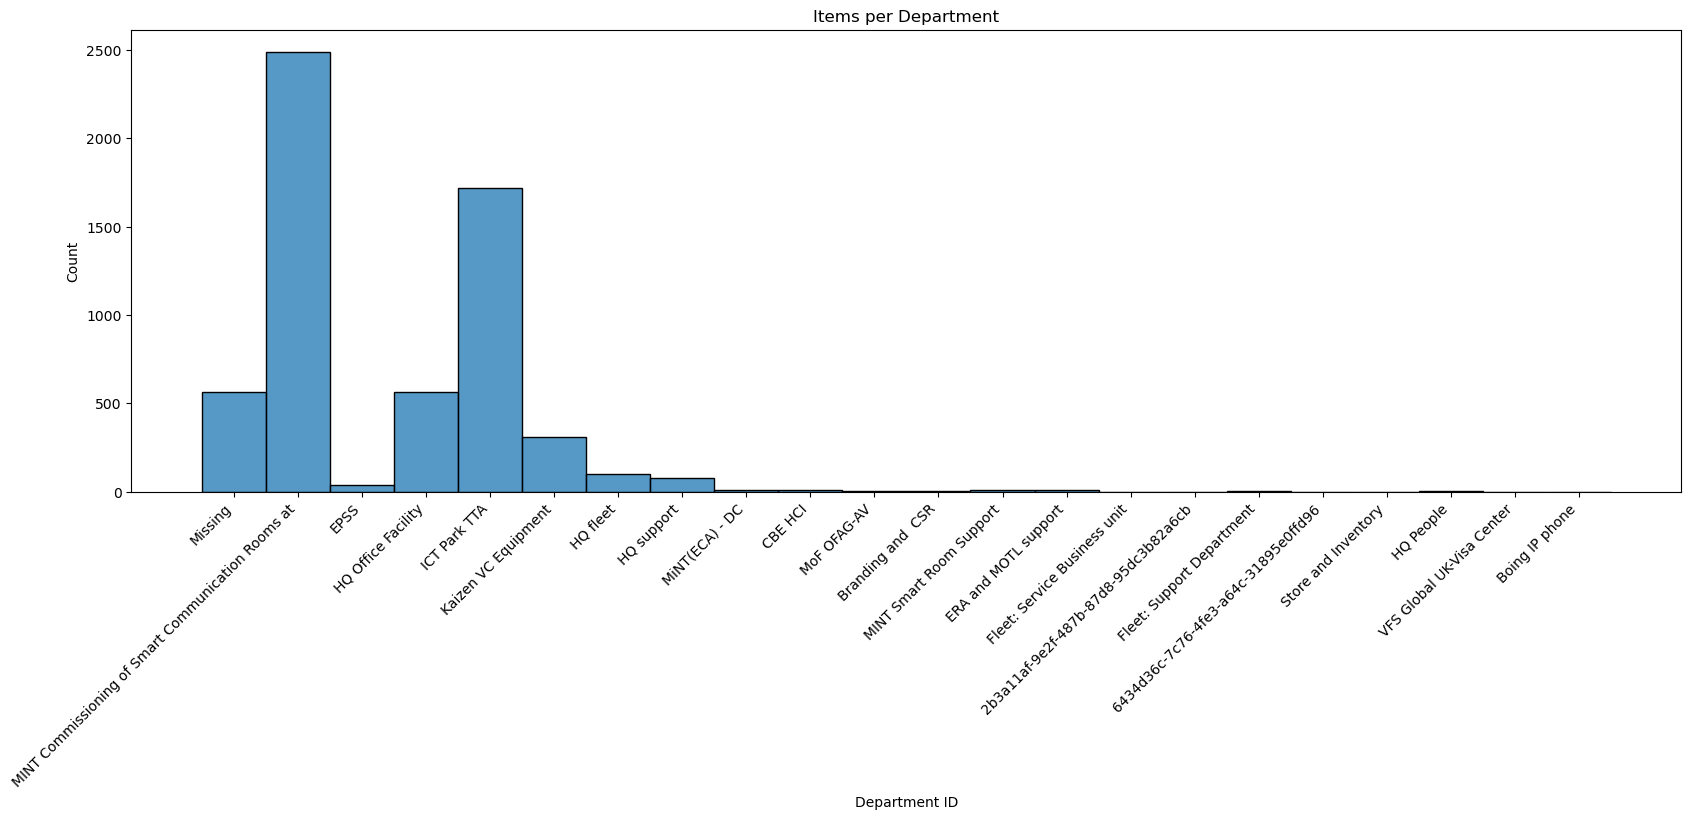

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data2` is your DataFrame

# Visualize Items per Department
plt.figure(figsize=(20, 6))
sns.histplot(data2['department_id'], bins=30)

# Set diagonal labels for x-axis
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.title('Items per Department')
plt.xlabel('Department ID')  # Optional: Add an x-axis label
plt.ylabel('Count')  # Optional: Add a y-axis label
plt.show()



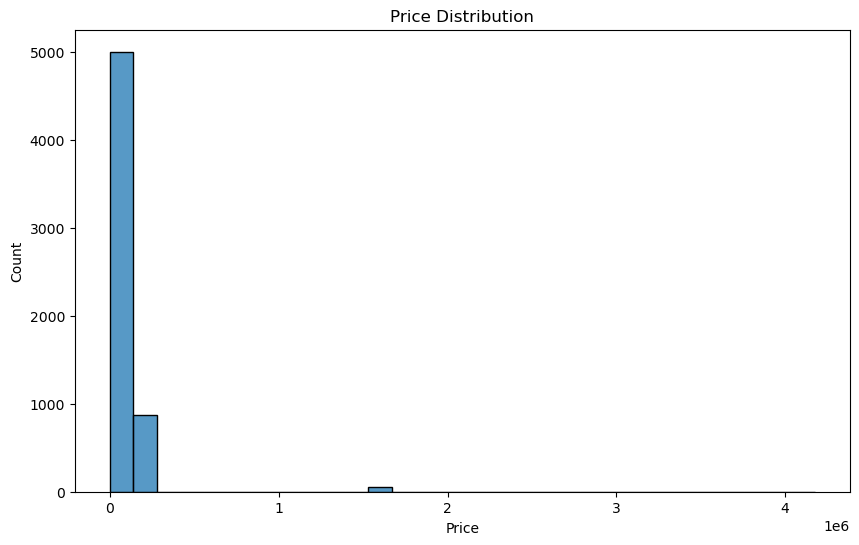

In [35]:
# Visualize Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data2['price'], bins=30)

# Set diagonal labels for x-axis
  # Rotate labels for better readability
plt.title('Price Distribution')
plt.xlabel('Price')  # Optional: Add an x-axis label
plt.ylabel('Count')  # Optional: Add a y-axis label
plt.show()

In [36]:
display(data2[['date_of_purchased','amount','created_at','updated_at', 'amount','quantity']])

,date_of_purchased,amount,created_at,updated_at,amount,quantity
0,2024-05-07,1.0,2024-04-19T14:44:49.000000Z,2025-01-29T13:15:58.000000Z,1.0,380.624281
1,2024-11-27,1.0,2024-11-27T06:53:13.000000Z,2025-01-22T05:30:57.000000Z,1.0,864.000000
2,2024-11-27,1.0,2024-11-27T06:53:14.000000Z,2024-11-27T06:53:14.000000Z,1.0,864.000000
3,2024-06-06,13.0,2024-06-06T13:54:42.000000Z,2024-12-10T08:50:09.000000Z,13.0,380.624281
4,2024-12-04,1.0,2024-12-04T06:22:19.000000Z,2024-12-04T06:22:19.000000Z,1.0,88.000000
...,...,...,...,...,...,...
6132,2024-11-14,1.0,2025-01-06T12:20:40.000000Z,2025-01-06T12:20:40.000000Z,1.0,12.000000
6133,2024-05-21,400.0,2024-05-21T08:04:25.000000Z,2024-06-17T05:46:02.000000Z,400.0,380.624281
6134,2024-12-19,1.0,2024-12-20T13:09:33.000000Z,2024-12-20T13:09:33.000000Z,1.0,45.000000
6135,2024-11-27,1.0,2024-11-27T12:29:33.000000Z,2024-11-27T12:29:33.000000Z,1.0,1000.000000


In [37]:
data2.to_csv('processed_data.csv', index=False)

In [38]:
import streamlit as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from datetime import datetime


# Encode categorical data
le_item = LabelEncoder()
data2['item_name_encoded'] = le_item.fit_transform(data2['item_name'])

# Creating features and labels
X = data2[['item_name_encoded', 'quantity']]
y = data2['project_id']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.9282700421940928


In [39]:
import joblib
from sklearn.preprocessing import LabelEncoder


le_item = LabelEncoder()

le_item.fit(data2['item_name'])
joblib.dump(le_item, 'label_encoder.pkl')

['label_encoder.pkl']

In [40]:
import joblib
joblib.dump(model, 'model.pkl')


['model.pkl']